<a href="https://colab.research.google.com/github/Dheerajthummala/Decision_tree/blob/main/Decision_tree(company_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [184]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [185]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [186]:
# as you can see "ShelveLoc","Urban","US" are in categorical variables
data1=data.copy()
data1=pd.get_dummies(data,prefix=["ShelveLoc","Urban","US"],drop_first=True)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [216]:
# as given the taxable.income <=30000 are risky and others are good
lable=['low','medium','high']
cut=[0,5,8,16.3]
data1['sales_ratio']=pd.cut(data1['Sales'],bins=cut,labels=lable,right=False)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_ratio
0,9.50,138,73,11,276,120,42,17,0,0,1,1,high
1,11.22,111,48,16,260,83,65,10,1,0,1,1,high
2,10.06,113,35,10,269,80,59,12,0,1,1,1,high
3,7.40,117,100,4,466,97,55,14,0,1,1,1,medium
4,4.15,141,64,3,340,128,38,13,0,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,high
396,6.14,139,23,3,37,120,55,11,0,1,0,1,medium
397,7.41,162,26,12,368,159,40,18,0,1,1,1,medium
398,5.94,100,79,7,284,95,50,12,0,0,1,1,medium


In [217]:
data1.sales_ratio.value_counts()

high      164
medium    159
low        77
Name: sales_ratio, dtype: int64

<Axes: xlabel='sales_ratio', ylabel='count'>

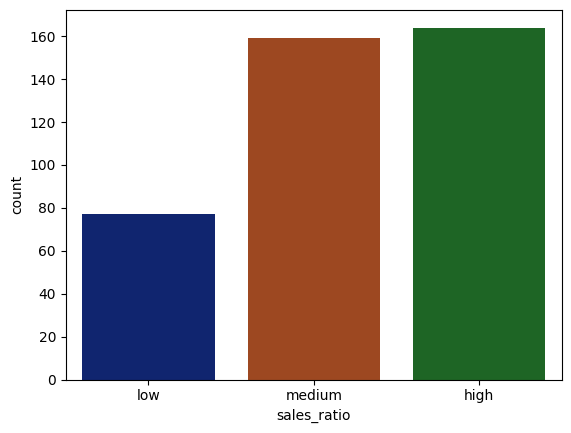

In [218]:
sns.countplot(data=data1, x='sales_ratio', palette = "dark")

In [219]:
# making target varible to indicator values
label_encoder = preprocessing.LabelEncoder()
data1['sales_ratio']= label_encoder.fit_transform(data1['sales_ratio'])
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_ratio
0,9.50,138,73,11,276,120,42,17,0,0,1,1,0
1,11.22,111,48,16,260,83,65,10,1,0,1,1,0
2,10.06,113,35,10,269,80,59,12,0,1,1,1,0
3,7.40,117,100,4,466,97,55,14,0,1,1,1,2
4,4.15,141,64,3,340,128,38,13,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1,2
397,7.41,162,26,12,368,159,40,18,0,1,1,1,2
398,5.94,100,79,7,284,95,50,12,0,0,1,1,2


In [220]:
data1.sales_ratio.value_counts()

0    164
2    159
1     77
Name: sales_ratio, dtype: int64

In [222]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Good    400 non-null    uint8  
 9   ShelveLoc_Medium  400 non-null    uint8  
 10  Urban_Yes         400 non-null    uint8  
 11  US_Yes            400 non-null    uint8  
 12  sales_ratio       400 non-null    int64  
dtypes: float64(1), int64(8), uint8(4)
memory usage: 29.8 KB


In [225]:
data2 = data1.drop('Sales', axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int64
 1   Income            400 non-null    int64
 2   Advertising       400 non-null    int64
 3   Population        400 non-null    int64
 4   Price             400 non-null    int64
 5   Age               400 non-null    int64
 6   Education         400 non-null    int64
 7   ShelveLoc_Good    400 non-null    uint8
 8   ShelveLoc_Medium  400 non-null    uint8
 9   Urban_Yes         400 non-null    uint8
 10  US_Yes            400 non-null    uint8
 11  sales_ratio       400 non-null    int64
dtypes: int64(8), uint8(4)
memory usage: 26.7 KB


In [226]:
X=data2.iloc[:,0:11]
Y=data2.iloc[:,11]

In [227]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [228]:
Y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    0
Name: sales_ratio, Length: 400, dtype: int64

In [229]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [230]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [231]:
data2.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes', 'sales_ratio'],
      dtype='object')

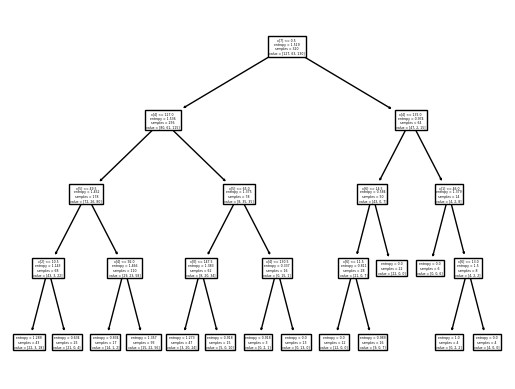

In [232]:
tree.plot_tree(model);


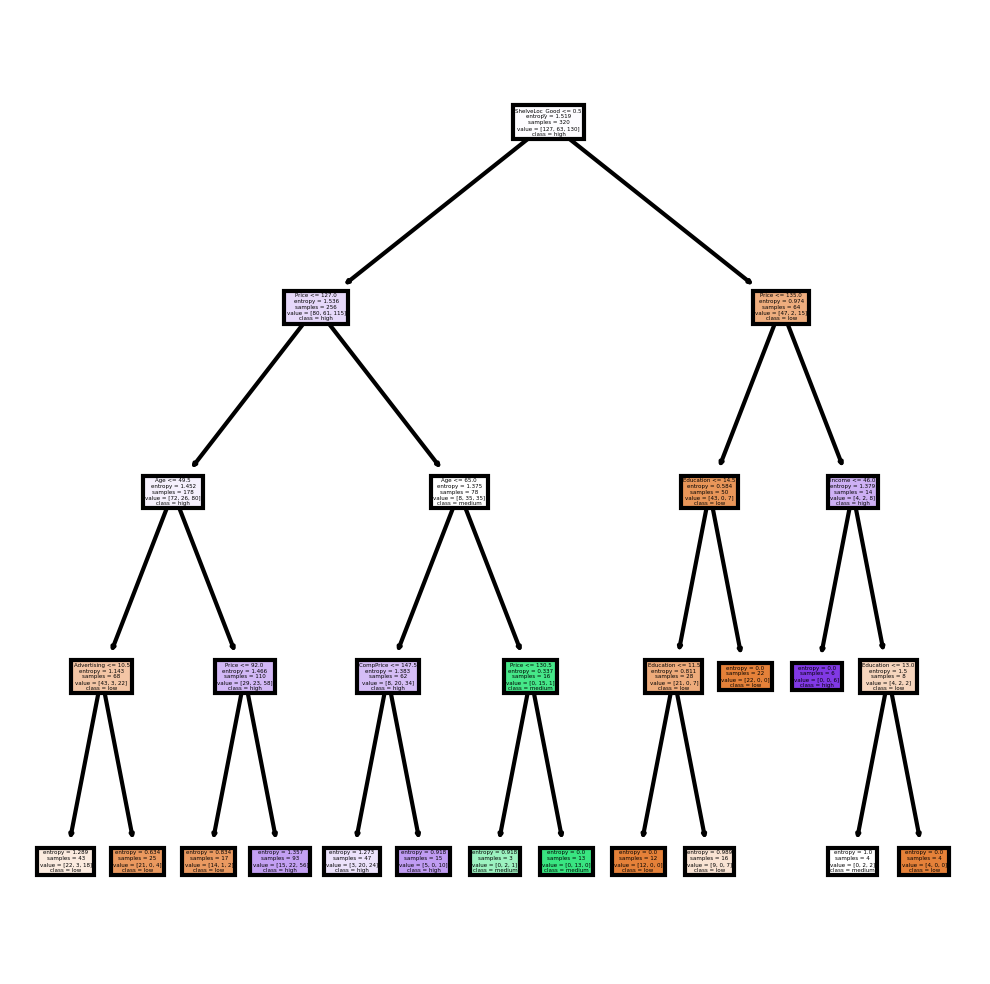

In [234]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'
       ]
cn=['low','medium','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [235]:
text = tree.export_text(model,max_depth=4)
print(text)

|--- feature_7 <= 0.50
|   |--- feature_4 <= 127.00
|   |   |--- feature_5 <= 49.50
|   |   |   |--- feature_2 <= 10.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  10.50
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  49.50
|   |   |   |--- feature_4 <= 92.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  92.00
|   |   |   |   |--- class: 2
|   |--- feature_4 >  127.00
|   |   |--- feature_5 <= 65.00
|   |   |   |--- feature_0 <= 147.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  147.50
|   |   |   |   |--- class: 2
|   |   |--- feature_5 >  65.00
|   |   |   |--- feature_4 <= 130.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  130.50
|   |   |   |   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_4 <= 135.00
|   |   |--- feature_6 <= 14.50
|   |   |   |--- feature_6 <= 11.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  11.50
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  14.50
|   |   |  

In [236]:
model.feature_importances_

array([0.06815539, 0.04099868, 0.03643254, 0.        , 0.36415471,
       0.19945507, 0.12009836, 0.17070526, 0.        , 0.        ,
       0.        ])

In [237]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Price               0.364155
Age                 0.199455
ShelveLoc_Good      0.170705
Education           0.120098
CompPrice           0.068155
Income              0.040999
Advertising         0.036433
Population          0.000000
ShelveLoc_Medium    0.000000
Urban_Yes           0.000000
US_Yes              0.000000
dtype: float64

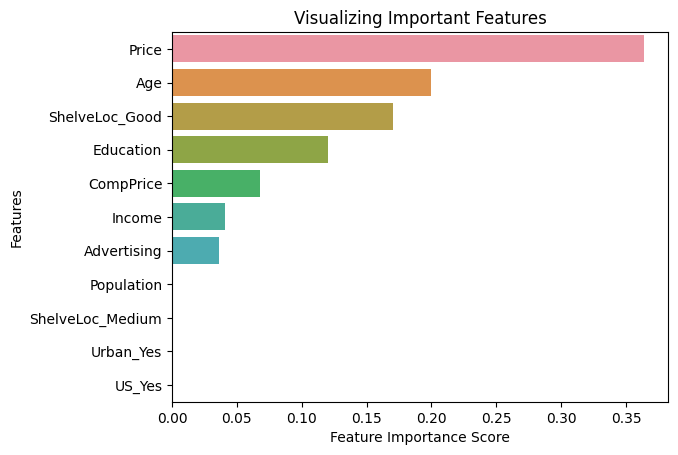

In [238]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [239]:
#Predicting on test data
preds = model.predict(X) # predicting on test data set
pd.Series(preds).value_counts()

2    191
0    184
1     25
dtype: int64

In [240]:
# 20% of our data
preds

array([0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0,

In [241]:
pd.crosstab(Y,preds)

col_0,0,1,2
sales_ratio,,,
0,133,2,29
1,7,18,52
2,44,5,110


In [242]:
# Accuracy
np.mean(preds==Y)

0.6525

In [243]:
#Gini criteria
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [244]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [245]:
pred=model.predict(X)
np.mean(pred==Y)

0.6525

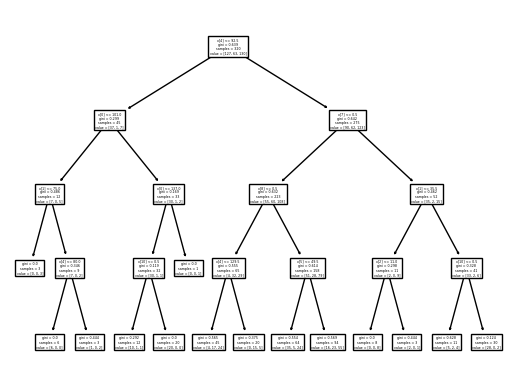

In [246]:
tree.plot_tree(model_gini);


In [247]:
prediction=pd.DataFrame()
prediction['pred_tax']=pred
prediction['tax']=Y
prediction

,pred_tax,tax
0,0,0
1,0,0
2,0,0
3,2,2
4,2,1
...,...,...
395,0,0
396,2,2
397,2,2
398,2,2
